In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import datetime
import json

In [15]:
outdir = 'output'
if not os.path.exists(outdir):
    raise FileNotFoundError(f"Output directory '{outdir}' does not exist.")

# list folders

folders = sorted(glob(os.path.join(outdir, '*/')))
print("Found folders:")
for folder in folders:
    print(f"  {folder}")

folder = folders[-1]
print(f"Using folder: {folder}")

Found folders:
  output/sparse_many_body_20250709_114231/
  output/sparse_many_body_20250709_115032/
  output/sparse_many_body_20250709_115359/
  output/sparse_many_body_20250709_115502/
Using folder: output/sparse_many_body_20250709_115502/


In [27]:
# load initial config in json
config_file = os.path.join(folder, 'params.json')
if not os.path.exists(config_file):
    raise FileNotFoundError(f"Config file '{config_file}' does not exist.")
with open(config_file, 'r') as f:
    config = json.load(f)
print("Loaded configuration:")
for key, value in config.items():
    print(f"  {key}: {value}")
    globals()[key] = value

Loaded configuration:
  N_particles: 2
  N_points: 200
  L_box: 6.283185307
  PBC: True


In [ ]:
eigenvalues_file = os.path.join(folder, 'eigvals.npy')
eigenvectors_file = os.path.join(folder, 'eigvecs.npy')

eigvals_array = np.load(eigenvalues_file)
eigvecs_array = np.load(eigenvectors_file)
print(f"Shape of eigenvecs: {eigvecs_array.shape}")

Shape of eigenvecs: (40000, 5)


Shape of first eigenvector: (40000,)
Reshaped ground state: (200, 200)


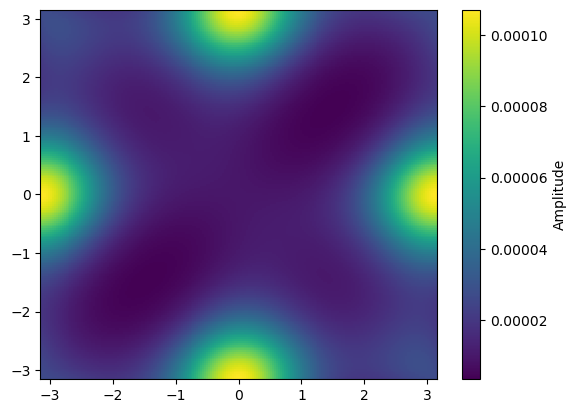

In [45]:
gs_state = eigvecs_array[:,0]

# normalize the ground state
norm = np.sqrt(np.sum(np.abs(gs_state)**2))
gs_state /= norm

print(f"Shape of first eigenvector: {gs_state.shape}")
reshaped_gs_state = gs_state.reshape((N_points, N_points))
print("Reshaped ground state:", reshaped_gs_state.shape)

x = np.linspace(-L_box/2, L_box/2, N_points)
y = np.linspace(-L_box/2, L_box/2, N_points)
X, Y = np.meshgrid(x, y)

plt.pcolor(X, Y, reshaped_gs_state**2, shading='auto', cmap='viridis')
plt.colorbar(label='Amplitude')

# plt.imshow(X, Y, reshaped_gs_state, aspect='auto', cmap='viridis')